In [1]:
from sklearn.datasets import make_circles

import matplotlib.pyplot as plt
import numpy as np
import torch

In [2]:
X, y = make_circles(n_samples=500, noise=0.1)

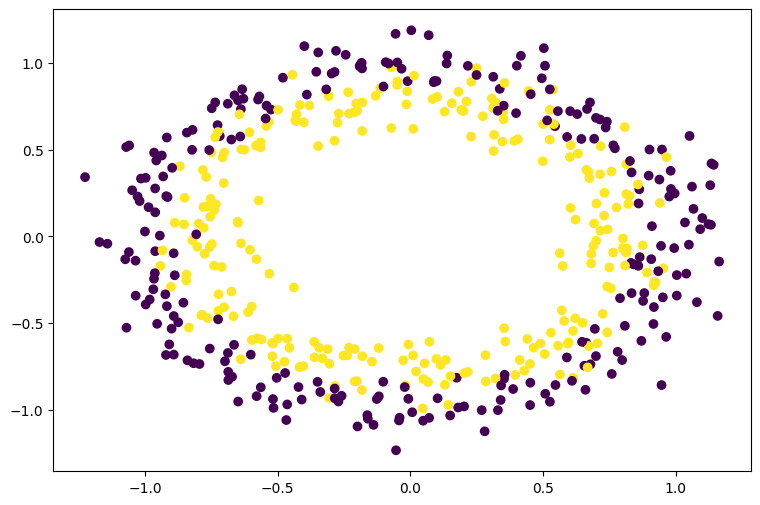

In [3]:
plt.figure(figsize=(9, 6))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [4]:
X = torch.FloatTensor(X)

In [5]:
def l2distance(a, b):
    return torch.argmin(
        torch.sum((a - b) ** 2, dim=1), dim=0
    )

In [6]:
def kMeans(x, num_cluster=2, max_iteration=5):
    device = torch.device('cpu')
    x = x.to(device)

    centroids = torch.randn(num_cluster, x.size(1)).to(device)
    for update in range(max_iteration):
        y_assign = list()
        for m in range(x.size(0)):
            h = x[m].expand(num_cluster, -1)
            assign = l2distance(h, centroids)
            y_assign.append(assign.item())

        y_assign = np.array(y_assign)
        if update != max_iteration - 1:
            for i in range(num_cluster):
                idx = np.where(y_assign == i)[0]
                centroids[i] = torch.mean(x[idx], dim=0)

    return y_assign, centroids.to(device)

In [11]:
y_pred, centroids = kMeans(X, 3)

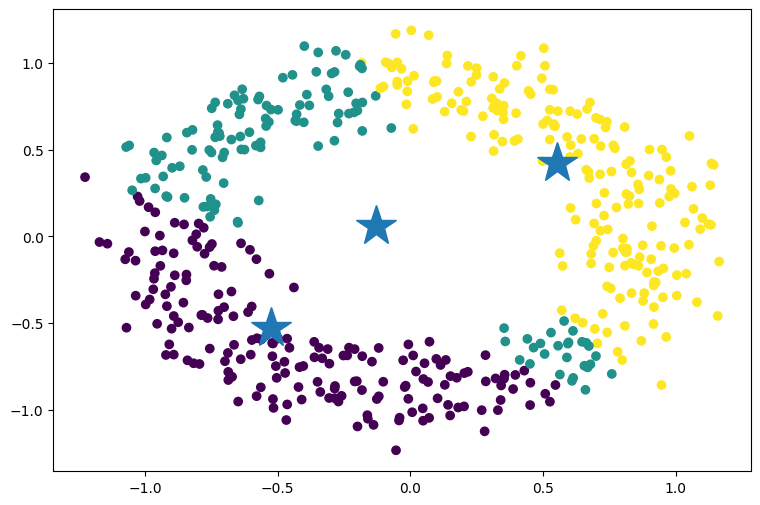

In [12]:
plt.figure(figsize=(9, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.plot(centroids[:, 0], centroids[:, 1], "*", markersize=30)
plt.show()